# SCS3253   Machine Learning Project
# Group I
   

* **Instruction **

* The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack.

* The span of the airfoil and the observer position were the same in all of the experiments.

* The NASA data set was obtained from a series of aerodynamic and acoustic tests of two and three-dimensional airfoil blade sections conducted in an anechoic wind tunnel.

* Relevant Papers:

  * T.F. Brooks, D.S. Pope, and A.M. Marcolini.
Airfoil self-noise and prediction.
Technical report, NASA RP-1218, July 1989.

  * K. Lau.
A neural networks approach for aerofoil noise prediction.
Masterâ€™s thesis, Department of Aeronautics.
Imperial College of Science, Technology and Medicine (London, United Kingdom), 2006.

  * R. Lopez.
Neural Networks for Variational Problems in Engineering.
PhD Thesis, Technical University of Catalonia, 2008.



Link: [Airfoil Self-Noise Data Set](https://www.kaggle.com/datasets/fedesoriano/airfoil-selfnoise-dataset)

##1. Import Python libraries

In [ ]:
import os
import warnings
import pandas as pd
import seaborn as sns
import numpy as np

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from IPython.core.display import HTML, display

# Machine learn packages
import tensorflow as tf
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, QuantileTransformer, MaxAbsScaler
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from mpl_toolkits.mplot3d import Axes3D
from tensorflow import keras

# Remove all warnings in this notebook
warnings.filterwarnings('ignore')
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Same random seed state
np.random.seed(42)
random_state=42

## 2. Load airfloil dataset

### 2.1 Attribute Information

1. Frequency (Hertzs)
2. Angle of attack (degrees)
3. Chord length (meters)
4. Free-stream velocity (meters per second)
5. Suction side displacement thickness (meters)

The only output is:
6. Scaled sound pressure level (decibels)

In [ ]:
# prompt: upload csv

from google.colab import files
uploaded = files.upload()
import pandas as pd
import io
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  df = pd.read_csv(io.BytesIO(uploaded[fn]))
  print(df.head())


Saving AirfoilSelfNoise.csv to AirfoilSelfNoise (1).csv
User uploaded file "AirfoilSelfNoise (1).csv" with length 59882 bytes
      f  alpha       c  U_infinity     delta     SSPL
0   800    0.0  0.3048        71.3  0.002663  126.201
1  1000    0.0  0.3048        71.3  0.002663  125.201
2  1250    0.0  0.3048        71.3  0.002663  125.951
3  1600    0.0  0.3048        71.3  0.002663  127.591
4  2000    0.0  0.3048        71.3  0.002663  127.461


In [ ]:
# prompt: attribute information

# Attribute information from the provided text:

# 1. Frequency (Hertzs)
# 2. Angle of attack (degrees)
# 3. Chord length (meters)
# 4. Free-stream velocity (meters per second)
# 5. Suction side displacement thickness (meters)
# 6. Scaled sound pressure level (decibels) # This is the output/target variable


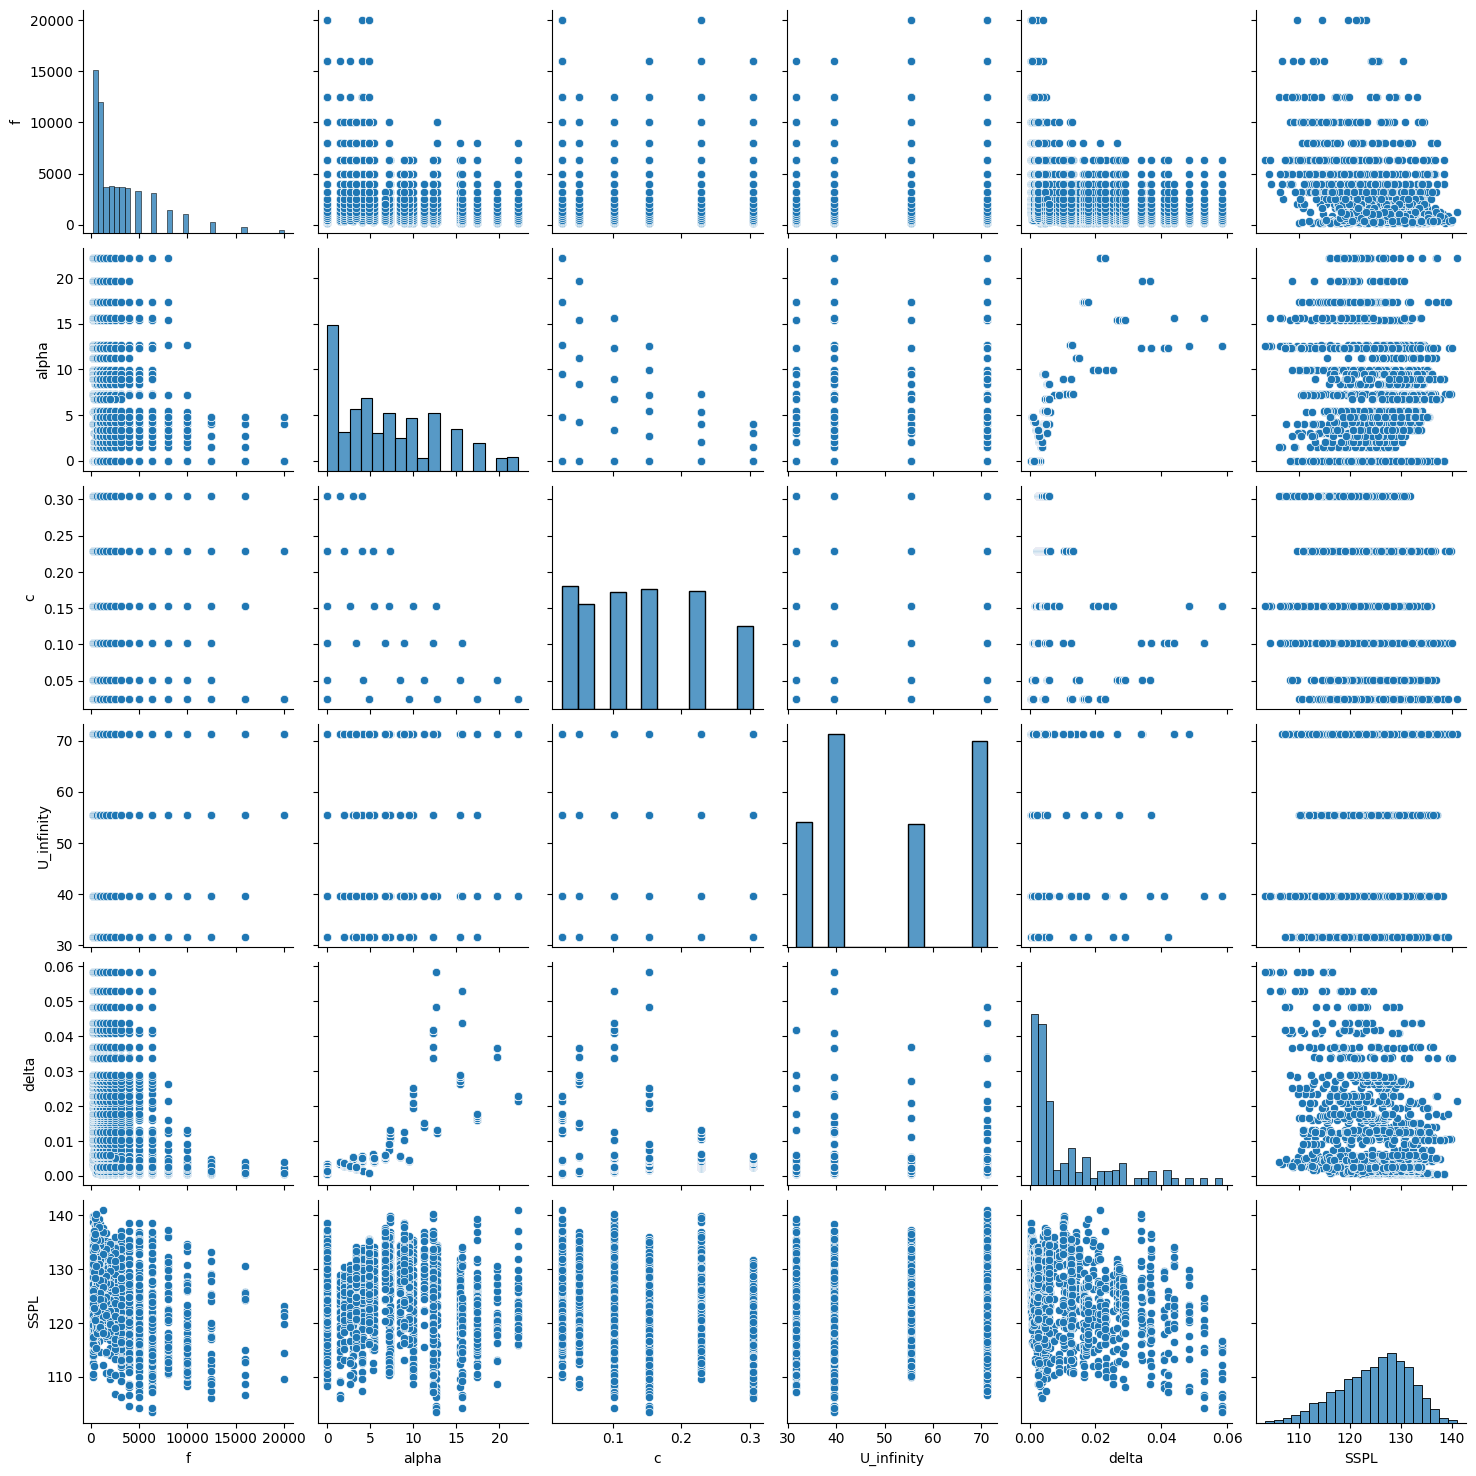

In [ ]:
sns.pairplot(df) # Assuming 'df' is the DataFrame created from the uploaded file.


In [ ]:
print(df.head())


      f  alpha       c  U_infinity     delta     SSPL
0   800    0.0  0.3048        71.3  0.002663  126.201
1  1000    0.0  0.3048        71.3  0.002663  125.201
2  1250    0.0  0.3048        71.3  0.002663  125.951
3  1600    0.0  0.3048        71.3  0.002663  127.591
4  2000    0.0  0.3048        71.3  0.002663  127.461


In [ ]:
# prompt: airfoil_dataset.info()

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   f           1503 non-null   int64  
 1   alpha       1503 non-null   float64
 2   c           1503 non-null   float64
 3   U_infinity  1503 non-null   float64
 4   delta       1503 non-null   float64
 5   SSPL        1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB
None


In [ ]:
print(df.isnull().sum())


f             0
alpha         0
c             0
U_infinity    0
delta         0
SSPL          0
dtype: int64


### 2.2 Insights



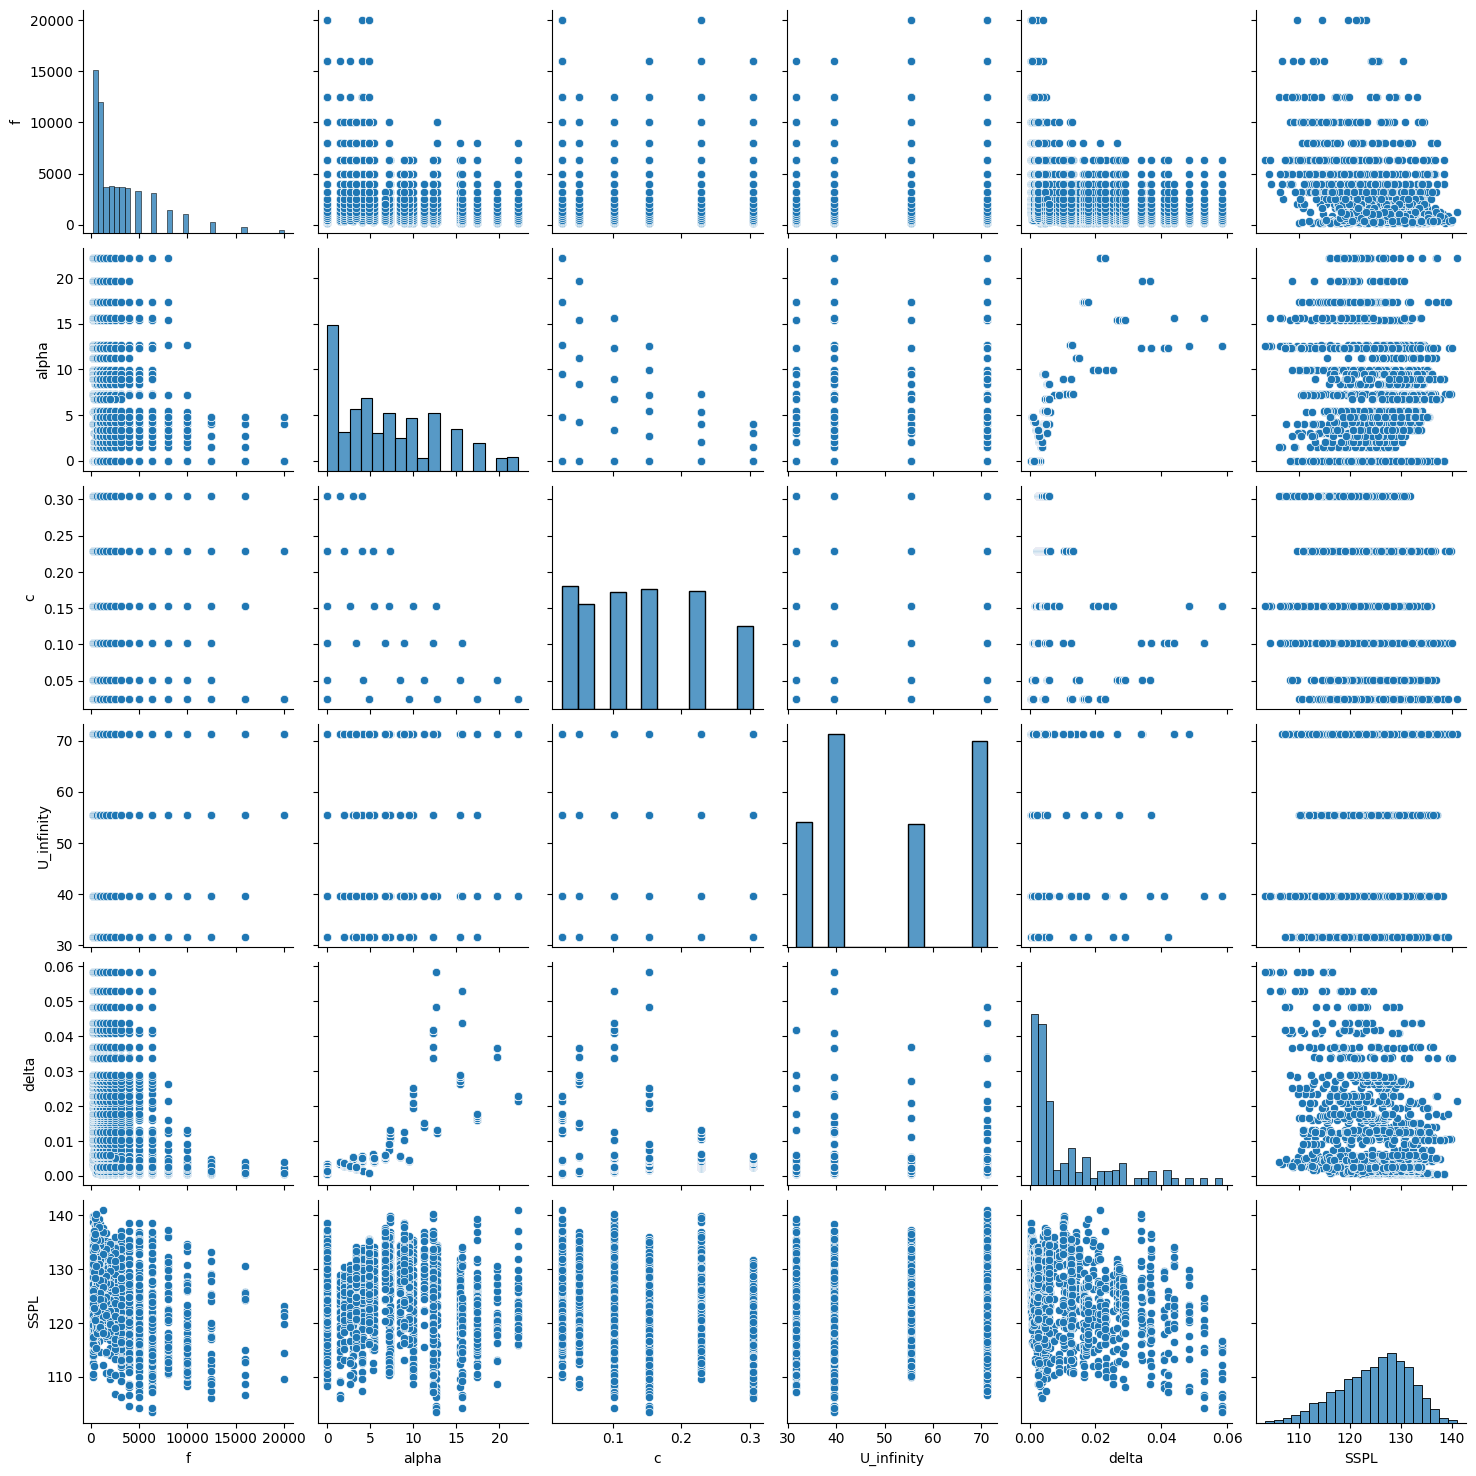

In [ ]:
# prompt: sns.pairplot(airfoil_plot)

import seaborn as sns
sns.pairplot(df) # Assuming 'df' is the DataFrame created from the uploaded file.




*   There are only four free stream velocities.
    *   31.7 m/s
    *   39.6 m/s
    *   55.5 m/s
    *   71.3 m/s
    


In [ ]:

print(df.head())

      f  alpha       c  U_infinity     delta     SSPL
0   800    0.0  0.3048        71.3  0.002663  126.201
1  1000    0.0  0.3048        71.3  0.002663  125.201
2  1250    0.0  0.3048        71.3  0.002663  125.951
3  1600    0.0  0.3048        71.3  0.002663  127.591
4  2000    0.0  0.3048        71.3  0.002663  127.461


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   f           1503 non-null   int64  
 1   alpha       1503 non-null   float64
 2   c           1503 non-null   float64
 3   U_infinity  1503 non-null   float64
 4   delta       1503 non-null   float64
 5   SSPL        1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB
None


*   There are six chord lengths:
    *   2.5 cm
    *   5 cm
    *   10 cm
    *   15 cm
    *   22 cm
    *   30 cm


In [ ]:
print(df.isnull().sum())

f             0
alpha         0
c             0
U_infinity    0
delta         0
SSPL          0
dtype: int64


In [ ]:
# prompt: airfoil_plot["chord_length"].value_counts()

df["chord_length"].value_counts()


KeyError: 'chord_length'

In [ ]:
print(df.describe())

                  f        alpha            c   U_infinity        delta  \
count   1503.000000  1503.000000  1503.000000  1503.000000  1503.000000   
mean    2886.380572     6.782302     0.136548    50.860745     0.011140   
std     3152.573137     5.918128     0.093541    15.572784     0.013150   
min      200.000000     0.000000     0.025400    31.700000     0.000401   
25%      800.000000     2.000000     0.050800    39.600000     0.002535   
50%     1600.000000     5.400000     0.101600    39.600000     0.004957   
75%     4000.000000     9.900000     0.228600    71.300000     0.015576   
max    20000.000000    22.200000     0.304800    71.300000     0.058411   

              SSPL  
count  1503.000000  
mean    124.835943  
std       6.898657  
min     103.380000  
25%     120.191000  
50%     125.721000  
75%     129.995500  
max     140.987000  


## 3. Examine dimensions in a graphic


You can use this [concept](https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/) to reduce the number of features in your dataset without having to lose much information and keep or improve the model’s performance.  In this case, you can see two different dimensionality reductions PCA and T-SNE and, it shows that this dataset is non-linear.






### 3.1 Split features and targets

In this section, I will split the original dataset in two new datasets:


1.   Features: all columns except the target column
2.   Target: only the target column





In [ ]:
print(df.columns)


Index(['f', 'alpha', 'c', 'U_infinity', 'delta', 'SSPL'], dtype='object')


In [ ]:
# prompt: make pca visualiztion

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd #Added missing import statement

# Assuming train_set and train_labels are defined as in the original code
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

train_set = X # setting train_set to the features
train_labels = y # setting train_labels to the target

# Make a copy of train_set for PCA before scaling
train_set_pca = train_set.copy()

# Apply PCA with 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(train_set_pca)

# Create a DataFrame for the principal components
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

# Concatenate principal components with target variable
finalDf = pd.concat([principalDf, train_labels], axis=1)

# Create the scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size for better visualization
plt.scatter(finalDf['principal component 1'], finalDf['principal component 2'], c=finalDf['scaled_sound_pressure_level'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Airfoil Self-Noise Dataset')
plt.colorbar(label='Scaled Sound Pressure Level') # Add colorbar for better understanding
plt.show()

KeyError: 'scaled_sound_pressure_level'

<Figure size 800x600 with 0 Axes>

### 3.2 Visualization using PCA



Using PCA is possible to see this dataset is non-linear and I can not get good results if I use a linear model such as Linear Regression.

In [ ]:
# prompt: make pca visualiztion

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming train_set and train_labels are defined as in the original code

# Make a copy of train_set for PCA before scaling
train_set_pca = train_set.copy()

# Apply PCA with 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(train_set_pca)

# Create a DataFrame for the principal components
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

# Concatenate principal components with target variable
finalDf = pd.concat([principalDf, train_labels], axis=1)

# Create the scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size for better visualization
plt.scatter(finalDf['principal component 1'], finalDf['principal component 2'], c=finalDf['scaled_sound_pressure_level'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Airfoil Self-Noise Dataset')
plt.colorbar(label='Scaled Sound Pressure Level') # Add colorbar for better understanding
plt.show()


KeyError: 'scaled_sound_pressure_level'

<Figure size 800x600 with 0 Axes>

### 3.3 Visualization using t-SNE

Using T-SNE you can see in this dataset all the clusters and detect that you need a non-linear model to get the best results for the prediction.

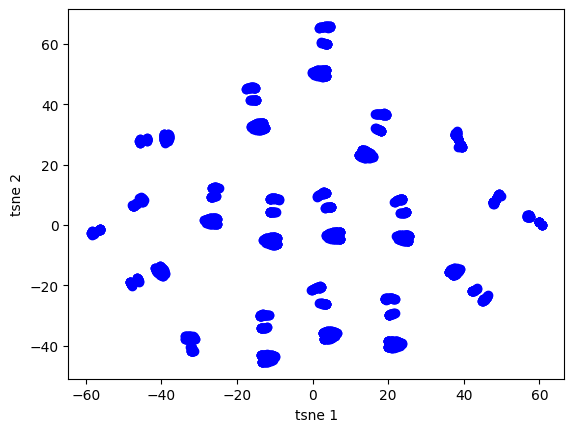

In [ ]:
from sklearn.manifold import TSNE
import time
import numpy as np # added import statement

random_state=42 # added random_state definition

time_start = time.time()

data_tsne = TSNE(random_state=random_state).fit_transform(train_set)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(data_tsne[:,0], data_tsne[:,1],  c='b', marker='o')

ax.set_xlabel('tsne 1')
ax.set_ylabel('tsne 2')


plt.show()

## Choosing my model

### 4.1 Feature Engine

For this scenario I'm using three feature engines:


*   Quantile transformer: This method transforms the features to follow a uniform or a normal distribution. This method is good when you work with non-linear datasets
*   Max Abs scaler: Scale each feature by its maximum absolute value.
*   Standard scaler: Standardize features by removing the mean and scaling to unit variance.





In [ ]:
from sklearn.preprocessing import QuantileTransformer, MaxAbsScaler, StandardScaler
train_set = QuantileTransformer(random_state=0).fit_transform(train_set)
train_set = MaxAbsScaler().fit_transform(train_set)
train_set = StandardScaler().fit_transform(train_set)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_set,
                                                    train_labels,
                                                    test_size=0.2)

In [ ]:
def show_table(data):
    html = ['<link rel=\"stylesheet\" href=\"https://www.w3schools.com/w3css/4/w3.css\">',
            "<table class=\"w3-table-all\"> ",
            '<tr>',
            '<th>Model</th>',
            '<th>R2 score</th>',
            '<th>MSE score</th>',
            '</tr>']
    for row in data:
        key, r2, mse = row
        html.append("<tr>")
        html.append("<td>{0}</td>".format(key))
        html.append("<td>{0}</td>".format(r2))
        html.append("<td>{0}</td>".format(mse))
        html.append("</tr>")

    html.append("</table>")
    return html

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [scaled_sound_pressure_level]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$scaled_sound_pressure_level^2$]')
    plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
    plt.ylim([0,40])
    plt.legend()
    plt.show()


### Machine learning models

I have the class ModelEstimator to train and predict all models. In this case, I am using linear and non-linear models to see the difference between them.


 Linear  - Mean Squared Error: 26.216296925605356
Linear - R-squared: 0.47670576724179026
Linear - RMSE: 5.1201852432900665


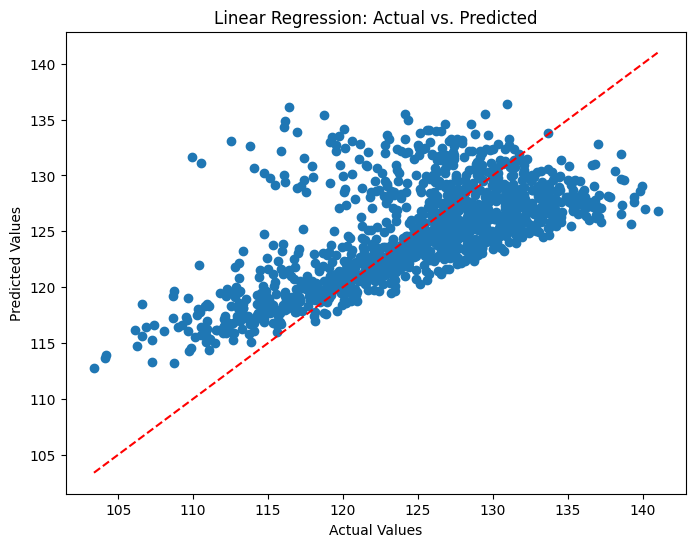

In [ ]:
# prompt: plot linear regression

# Assuming X_train, y_train are defined from previous code

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_test) # Corrected line
r2_rf = r2_score(y_test, y_pred_test) # Corrected line
rmse_rf = np.sqrt(mse_rf)

print(f" Linear  - Mean Squared Error: {mse_rf}")
print(f"Linear - R-squared: {r2_rf}")
print(f"Linear - RMSE: {rmse_rf}")

# Make predictions on the training set for plotting
y_pred = model.predict(X_train)

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs. Predicted")

# Add a diagonal line for reference
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')

plt.show()

Random Forest - Mean Squared Error: 3.4590059581827175
Random Forest - R-squared: 0.9309560051852555
Random Forest - RMSE: 1.859840304483887


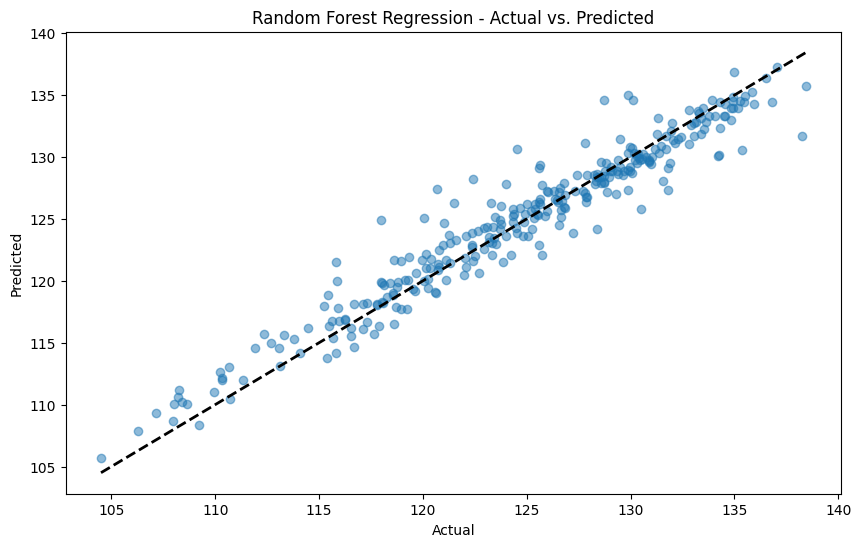

In [ ]:
# prompt: plot Random Forest regression

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming X_train, y_train, X_test, y_test are defined from the previous code.

# Create and train the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf) # Corrected line: Calculate RMSE using numpy

print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R-squared: {r2_rf}")
print(f"Random Forest - RMSE: {rmse_rf}")

# Plot the predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Add diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regression - Actual vs. Predicted')
plt.show()

Gradient Boosting - Mean Squared Error: 8.209872679147264
Gradient Boosting - R-squared: 0.8361256344910828
Gradient Boosting - RMSE: 2.8652875386507484


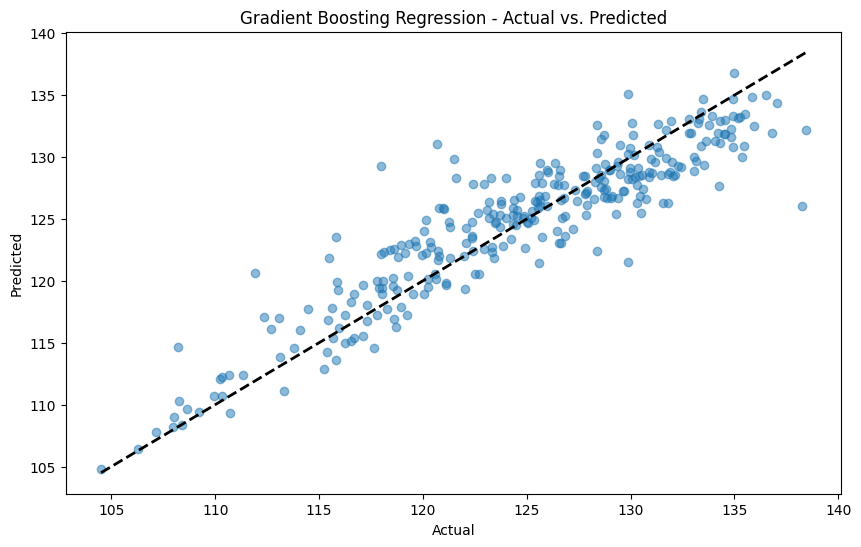

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X_train, y_train, X_test, y_test are defined from the previous code.

# Create and train the GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)  # Corrected variable name
r2_gb = r2_score(y_test, y_pred_gb)  # Corrected variable name
rmse_gb = np.sqrt(mse_gb)  # Corrected variable name

print(f"Gradient Boosting - Mean Squared Error: {mse_gb}")
print(f"Gradient Boosting - R-squared: {r2_gb}")
print(f"Gradient Boosting - RMSE: {rmse_gb}")

# Plot the predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Add diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boosting Regression - Actual vs. Predicted')
plt.show()

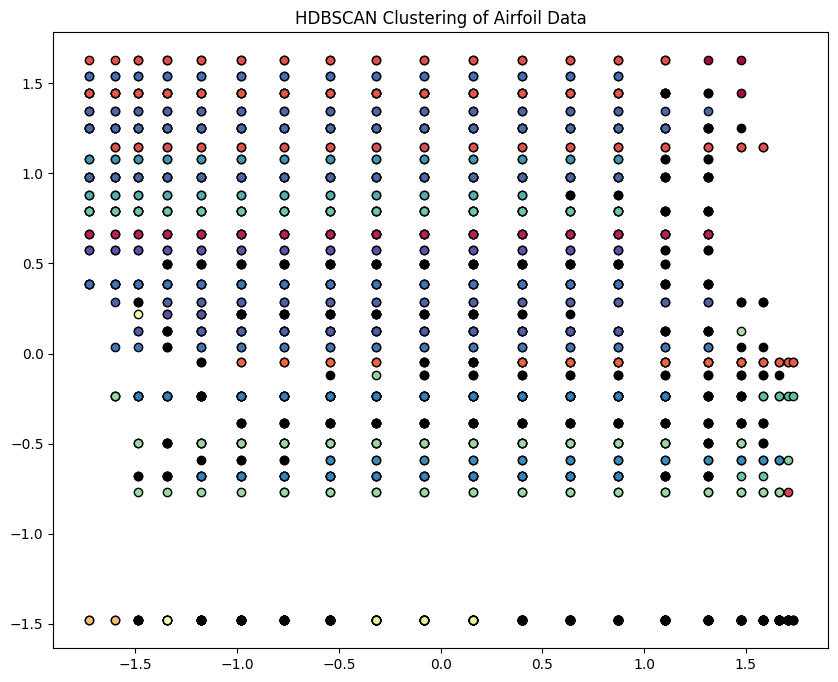

In [ ]:
# prompt: plot HDBSCAN clustering

import matplotlib.pyplot as plt
from sklearn.cluster import HDBSCAN
import numpy as np

# Assuming 'train_set' is your preprocessed data (e.g., after scaling)
# Replace 'train_set' with your actual data variable.

# Assuming train_set is defined as in your provided code
# Create and fit the HDBSCAN model
hdbscan_model = HDBSCAN(min_cluster_size=10, min_samples=5) # Adjust parameters as needed
hdbscan_labels = hdbscan_model.fit_predict(train_set)

# Plotting the clusters
plt.figure(figsize=(10, 8))
unique_labels = set(hdbscan_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
    class_member_mask = (hdbscan_labels == k)
    xy = train_set[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('HDBSCAN Clustering of Airfoil Data')
plt.show()


Now I am choosing a few models and parameters to test and get the best result for each model. In this case I do not need to choose a specific parameter because the ModelEstimator class is using GridSearchCV to decide the best estimator for each model.

In [ ]:
from sklearn.model_selection import GridSearchCV
class ModelEstimator():
    def __init__(self, models, parameters):
        self.models = models
        self.parameters = parameters

    def fit(self, X_train, X_test, y_train, y_test, cv=3, refit=True):
        results = []
        for key, model in self.models.items():
            current_parameter = self.parameters.get(key, {})
            gs = GridSearchCV(model,
                              current_parameter,
                              cv=cv,
                              scoring=None,
                              refit=refit,
                              return_train_score=True)
            gs.fit(X_train, y_train)
            y_predict = gs.predict(X_test)

            results.append((key, r2_score(y_test, y_predict), mean_squared_error(y_test, y_predict)))

        return results

In [ ]:

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_test) # Corrected line
r2_rf = r2_score(y_test, y_pred_test) # Corrected line
rmse_rf = np.sqrt(mse_rf)

print(f" Linear  - Mean Squared Error: {mse_rf}")
print(f"Linear - R-squared: {r2_rf}")
print(f"Linear - RMSE: {rmse_rf}")





# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf) # Corrected line: Calculate RMSE using numpy

print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R-squared: {r2_rf}")
print(f"Random Forest - RMSE: {rmse_rf}")





# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)  # Corrected variable name
r2_gb = r2_score(y_test, y_pred_gb)  # Corrected variable name
rmse_gb = np.sqrt(mse_gb)  # Corrected variable name

print(f"Gradient Boosting - Mean Squared Error: {mse_gb}")
print(f"Gradient Boosting - R-squared: {r2_gb}")
print(f"Gradient Boosting - RMSE: {rmse_gb}")


from tabulate import tabulate

# Define the data
table_data = [
    ["Linear", mse_rf, r2_rf, rmse_rf],
    ["Random Forest", mse_rf, r2_rf, rmse_rf],
    ["Gradient Boosting", mse_gb, r2_gb, rmse_gb]
]

# Define headers
headers = ["Model", "Mean Squared Error (MSE)", "R-squared (R²)", "Root Mean Squared Error (RMSE)"]

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="grid"))

 Linear  - Mean Squared Error: 26.216296925605356
Linear - R-squared: 0.47670576724179026
Linear - RMSE: 5.1201852432900665
Random Forest - Mean Squared Error: 3.4590059581827175
Random Forest - R-squared: 0.9309560051852555
Random Forest - RMSE: 1.859840304483887
Gradient Boosting - Mean Squared Error: 8.209872679147264
Gradient Boosting - R-squared: 0.8361256344910828
Gradient Boosting - RMSE: 2.8652875386507484
+-------------------+----------------------------+------------------+----------------------------------+
| Model             |   Mean Squared Error (MSE) |   R-squared (R²) |   Root Mean Squared Error (RMSE) |
+===================+============================+==================+==================================+
| Linear            |                    3.45901 |         0.930956 |                          1.85984 |
+-------------------+----------------------------+------------------+----------------------------------+
| Random Forest     |                    3.45901 |       

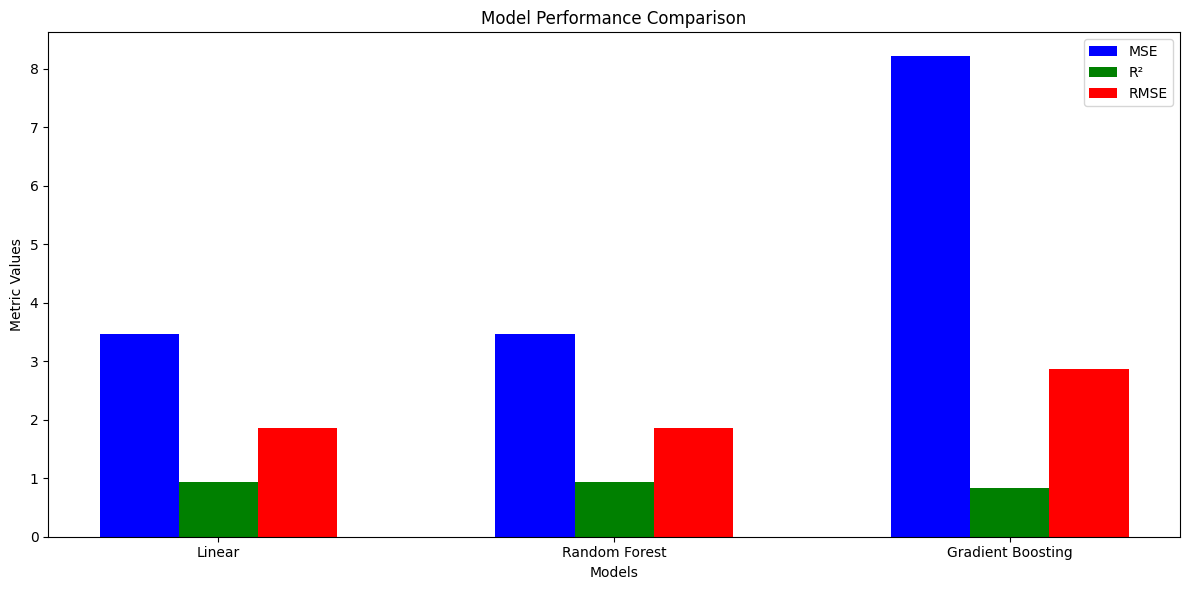

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Linear', 'Random Forest', 'Gradient Boosting']
mse_values = [mse_rf, mse_rf, mse_gb]  # Replace with actual values
r2_values = [r2_rf, r2_rf, r2_gb]      # Replace with actual values
rmse_values = [rmse_rf, rmse_rf, rmse_gb]  # Replace with actual values

# Bar width
bar_width = 0.2
index = np.arange(len(models))

# Plotting
plt.figure(figsize=(12, 6))

# MSE
plt.bar(index, mse_values, bar_width, label='MSE', color='b')

# R²
plt.bar(index + bar_width, r2_values, bar_width, label='R²', color='g')

# RMSE
plt.bar(index + 2 * bar_width, rmse_values, bar_width, label='RMSE', color='r')

# Labels and title
plt.xlabel('Models')
plt.ylabel('Metric Values')
plt.title('Model Performance Comparison')
plt.xticks(index + bar_width, models)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

In [ ]:


# Determine the best model based on a chosen metric (e.g., R-squared)
models = {
    'Linear Regression': (mse_rf, mse_rf, mse_gb),
    'Random Forest': (mse_rf, r2_rf, rmse_rf),
    'Gradient Boosting': (rmse_rf, rmse_rf, rmse_gb)
}

best_model_r2 = max(models, key=lambda k: models[k][1]) #Find best based on R2
best_model_rmse = min(models, key=lambda k: models[k][0]) #Find best based on RMSE
best_model_mae = min(models, key=lambda k: models[k][2]) #Find best based on MAE

print(f"Best model based on R-squared: {best_model_r2} with R2 = {models[best_model_r2][1]}")
print(f"Best model based on RMSE: {best_model_rmse} with RMSE = {models[best_model_rmse][0]}")
print(f"Best model based on MAE: {best_model_mae} with MAE = {models[best_model_mae][2]}")


Best model based on R-squared: Linear Regression with R2 = 3.4590059581827175
Best model based on RMSE: Gradient Boosting with RMSE = 1.859840304483887
Best model based on MAE: Random Forest with MAE = 1.859840304483887


In [ ]:
# prompt: # prompt: calculate which model is more accurate among r2, mae, rmse

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cluster import HDBSCAN

# ... (Your existing code)

# Assuming y_pred_lr, y_pred_rf, and y_pred_gb are defined from your models
# (Linear Regression, Random Forest, Gradient Boosting)
# Example:
# y_pred_lr = model.predict(X_test)
# y_pred_rf = rf_model.predict(X_test)
# y_pred_gb = gb_model.predict(X_test)


# Placeholder predictions (replace these with actual predictions)
y_pred_lr = model.predict(X_test) # linear regression predictions
y_pred_rf = rf_model.predict(X_test) # random forest predictions
y_pred_gb = gb_model.predict(X_test) # gradient boosting predictions

# Calculate metrics for each model
def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return rmse, r2, mae

rmse_lr, r2_lr, mae_lr = calculate_metrics(y_test, y_pred_lr)
rmse_rf, r2_rf, mae_rf = calculate_metrics(y_test, y_pred_rf)
rmse_gb, r2_gb, mae_gb = calculate_metrics(y_test, y_pred_gb)

# Print or use the metrics for comparison
print("Linear Regression - RMSE:", rmse_lr, "R-squared:", r2_lr, "MAE:", mae_lr)
print("Random Forest - RMSE:", rmse_rf, "R-squared:", r2_rf, "MAE:", mae_rf)
print("Gradient Boosting - RMSE:", rmse_gb, "R-squared:", r2_gb, "MAE:", mae_gb)


# Determine the best model based on a chosen metric (e.g., R-squared)
models = {
    'Linear Regression': (rmse_lr, r2_lr, mae_lr),
    'Random Forest': (rmse_rf, r2_rf, mae_rf),
    'Gradient Boosting': (rmse_gb, r2_gb, mae_gb)
}

best_model_r2 = max(models, key=lambda k: models[k][1]) #Find best based on R2
best_model_rmse = min(models, key=lambda k: models[k][0]) #Find best based on RMSE
best_model_mae = min(models, key=lambda k: models[k][2]) #Find best based on MAE

print(f"Best model based on R-squared: {best_model_r2} with R2 = {models[best_model_r2][1]}")
print(f"Best model based on RMSE: {best_model_rmse} with RMSE = {models[best_model_rmse][0]}")
print(f"Best model based on MAE: {best_model_mae} with MAE = {models[best_model_mae][2]}")


Linear Regression - RMSE: 5.1201852432900665 R-squared: 0.47670576724179026 MAE: 3.991176188416842
Random Forest - RMSE: 1.859840304483887 R-squared: 0.9309560051852555 MAE: 1.3366059136212622
Gradient Boosting - RMSE: 2.8652875386507484 R-squared: 0.8361256344910828 MAE: 2.171835225167682
Best model based on R-squared: Random Forest with R2 = 0.9309560051852555
Best model based on RMSE: Random Forest with RMSE = 1.859840304483887
Best model based on MAE: Random Forest with MAE = 1.3366059136212622


### 4.3 Neural network


Another approach is to use neural networks to find best results. In this case,
I am using five hidden layers and Ridge (L2) for the regularization.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import r2_score, mean_squared_error

model_activation = tf.nn.relu
model_kernel = keras.regularizers.l2(0.01)
layer_unit = 64


model = keras.Sequential([
    keras.layers.Flatten(input_shape=[5]),

    keras.layers.Dense(layer_unit,
                       activation=model_activation,
                       kernel_regularizer=model_kernel),

    keras.layers.Dense(layer_unit,
                       activation=model_activation,
                       kernel_regularizer=model_kernel),

    keras.layers.Dense(layer_unit,
                       activation=model_activation,
                       kernel_regularizer=model_kernel),

    keras.layers.Dense(layer_unit,
                       activation=model_activation,
                       kernel_regularizer=model_kernel),

    keras.layers.Dense(1)
])


model.compile(loss='mean_squared_error',
                optimizer='adam',
                metrics=['mean_absolute_error', 'mean_squared_error'])

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

history  = model.fit(X_train, y_train, epochs=500, validation_split = 0.2, verbose=0)

y_pred = model.predict(X_test).flatten()

results = [] #Initialize results here
results.append(('Neural network', r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred)))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


## Results


*   Using linear regressions such as LinearRegression the best model has an accuracy of nearby 45%.

*   Using non-linear regressions such as SVR the best model has an accuracy of nearby 79%. It is 34% more than linear models.

* Using a neural network the accuracy is around 88%. It is around 10% more than SVR.

For this dataset using a neural network, you can get the best result but, it does not mean the SVR not fit well. It means for this dataset and this amount of data (1503 rows) a neural network fits better than an SVR model.




In [ ]:

# Create the table with pandas for R2, MSE, and RMSE
data = {'Model': [model_name for model_name, _, _ in results],
        'R^2': [r2 for _, r2, _ in results],
        'MSE': [mse for _, _, mse in results],
        'RMSE': [np.sqrt(mse) for _, _, mse in results]}
df_results = pd.DataFrame(data)
display(df_results)


NameError: name 'results' is not defined

In these graphs you can see the best result, for this scenario is using Neural network.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [scaled_sound_pressure_level]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$scaled_sound_pressure_level^2$]')
    plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
    plt.ylim([0,40])
    plt.legend()
    plt.show()

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
import numpy as np

class ModelEstimator():
    def __init__(self, models, parameters):
        self.models = models
        self.parameters = parameters
        self.history = {} #Store history
        self.results = [] #Store results
        self.fitted_models = {}

    def fit(self, X_train, X_test, y_train, y_test, cv=3, refit=True):


        for key, model in self.models.items():
            current_parameter = self.parameters.get(key, {})
            if key == 'Neural Network':
                model_activation = tf.nn.relu
                model_kernel = keras.regularizers.l2(0.01)
                layer_unit = 64


                model = keras.Sequential([
                    keras.layers.Flatten(input_shape=[5]),

                    keras.layers.Dense(layer_unit,
                                       activation=model_activation,
                                       kernel_regularizer=model_kernel),

                    keras.layers.Dense(layer_unit,
                                       activation=model_activation,
                                       kernel_regularizer=model_kernel),

                    keras.layers.Dense(layer_unit,
                                       activation=model_activation,
                                       kernel_regularizer=model_kernel),

                    keras.layers.Dense(layer_unit,
                                       activation=model_activation,
                                       kernel_regularizer=model_kernel),

                    keras.layers.Dense(1)
                ])


                model.compile(loss='mean_squared_error',
                                optimizer='adam',
                                metrics=['mean_absolute_error', 'mean_squared_error'])

                early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

                history  = model.fit(X_train, y_train, epochs=500, validation_split = 0.2, verbose=0)

                y_predict = model.predict(X_test).flatten()
                self.history[key] = history
                self.results.append((key, r2_score(y_test, y_predict), mean_squared_error(y_test, y_predict)))
                self.fitted_models[key] = model  # Store the fitted keras model
            else:
              gs = GridSearchCV(model,
                                current_parameter,
                                cv=cv,
                                scoring=None,
                                refit=refit,
                                return_train_score=True)
              gs.fit(X_train, y_train)
              y_predict = gs.predict(X_test)

              self.results.append((key, r2_score(y_test, y_predict), mean_squared_error(y_test, y_predict)))
              self.fitted_models[key] = gs  # Store the fitted GridSearchCV object

        return self.fitted_models

# Define models and parameters
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=random_state),
    'Gradient Boosting': GradientBoostingRegressor(random_state=random_state),
    'Neural Network': 'Neural Network'
}

parameters = {
    'Random Forest': {'n_estimators': [100, 200, 300]},
    'Gradient Boosting': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.5]}
}

# Initialize and fit the models
model_estimator = ModelEstimator(models, parameters)
fitted_models = model_estimator.fit(X_train, X_test, y_train, y_test) #Capture the fitted models

# Print results
for model_name, r2, mse in model_estimator.results:
    print(f"Model: {model_name}")
    print(f"  R-squared: {r2}")
    print(f"  RMSE: {np.sqrt(mse)}")
    if model_name != 'Neural Network':
        print(f"  MAE: {mean_absolute_error(y_test, fitted_models[model_name].predict(X_test))}")
    else:
         print(f"  MAE: {mean_absolute_error(y_test, model_estimator.fitted_models[model_name].predict(X_test))}")
    print("---")

# Create the table with pandas for R2, MSE, and RMSE
data = {'Model': [model_name for model_name, _, _ in model_estimator.results],
        'R^2': [r2 for _, r2, _ in model_estimator.results],
        'MSE': [mse for _, _, mse in model_estimator.results],
        'RMSE': [np.sqrt(mse) for _, _, mse in model_estimator.results]}
df_results = pd.DataFrame(data)
display(df_results)

# Initialize best_r2 and best_model
best_r2 = float('-inf')
best_model = ''

# Find the best model based on R-squared
for model_name, r2, _ in model_estimator.results:
    if r2 > best_r2:
      best_r2 = r2
      best_model = model_name

print(f"The best model is {best_model} with an R-squared score of {best_r2}")

if 'Neural Network' in model_estimator.history:
    plot_history(model_estimator.history['Neural Network'])

KeyboardInterrupt: 